In [1]:
import os


import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Reading csv file
columns_name = [
    "time", "gender", "matric_%", "study_year","faculty","gpa_2023","accomodation","allowance","scholarship",
    "study_hours","party_week","drinks_night","missed_classes","failed_classes","in_relationship","parent_approve","relation_parent"
]
student_data = pd.read_csv("survey.csv", names = columns_name, header =0)

In [3]:
student_data.head()

,time,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Exploratory Data Analysis (EDA)

* basic information
* missing values
* numerical and categorical values
* visualization
* correlation, outliers

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             406 non-null    object 
 1   gender           404 non-null    object 
 2   matric_%         399 non-null    float64
 3   study_year       333 non-null    object 
 4   faculty          399 non-null    object 
 5   gpa_2023         320 non-null    float64
 6   accomodation     383 non-null    object 
 7   allowance        375 non-null    object 
 8   scholarship      398 non-null    object 
 9   study_hours      403 non-null    object 
 10  party_week       404 non-null    object 
 11  drinks_night     404 non-null    object 
 12  missed_classes   403 non-null    object 
 13  failed_classes   403 non-null    object 
 14  in_relationship  403 non-null    object 
 15  parent_approve   402 non-null    object 
 16  relation_parent  403 non-null    object 
dtypes: float64(2), o

In [5]:
student_data.isna().sum()

time                0
gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

-- description --

### Missing Data Overview

- **Most data is complete**, except for a few columns with notable gaps.  
- Largest gaps:
  - `gpa_2023`: 86 missing
  - `study_year`: 73 missing
  - `allowance`: 31 missing
  - `accomodation`: 23 missing
- All other columns have fewer than 10 missing entries.

**Key takeaway:**  
Only a few fields have significant missing data, and these may need extra attention during analysis.


In [6]:
student_data.gender.value_counts(normalize=True)

gender
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

### Gender Distribution

- **Male:** 53.47%  
- **Female:** 46.53%  

**Key takeaway:**  
The dataset has a fairly balanced gender split, with a slightly higher proportion of males.


In [9]:
#parent_approve, relation_parent

table = pd.crosstab(student_data.parent_approve, student_data.relation_parent)
table = table[["Distant","Fair","Close","Very close"]]

<Axes: xlabel='relation_parent'>

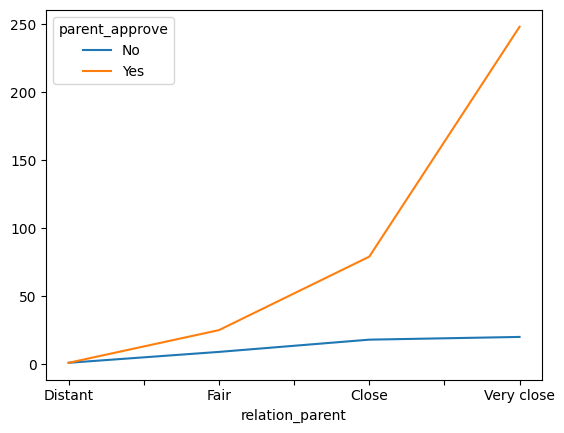

In [10]:
table.T.plot.line()

### Relationship with Parents vs. Parental Approval

- Students with a **"Very close"** relationship tend to have the highest parental approval.
- Approval drops as relationships become **less close** (Close → Fair → Distant).
- The trend suggests that stronger parent–child relationships are linked to higher approval levels.

**Key takeaway:**  
Improving family closeness may positively influence parental approval rates.


### Relationship with parent closeness and score gained

In [18]:
group_parent = student_data.groupby(by = "relation_parent")
info = group_parent["matric_%"].aggregate(('min','max','mean'))

In [19]:
info

,min,max,mean
relation_parent,,,
Close,60.0,98.33,77.690000
Distant,85.0,98.00,91.500000
Fair,55.0,95.50,78.357143
Very close,34.0,99.00,77.960114


<Axes: xlabel='relation_parent'>

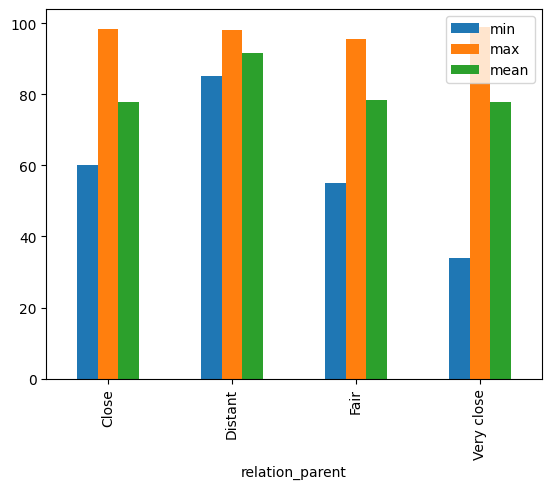

In [21]:
info.plot.bar()

### Matric % by Relationship with Parents

- **Very close** relationships have the **highest average matric %**, along with relatively high minimum and maximum scores.
- **Close** relationships also show strong performance, slightly below "Very close".
- **Fair** and **Distant** relationships have noticeably lower averages and wider score ranges.

**Key takeaway:**  
Stronger relationships with parents appear to be linked to better matriculation performance.


In [23]:
group_parent = student_data.groupby(by = "faculty")
info = group_parent["drinks_night"].aggregate("count")

In [24]:
info

faculty
AgriSciences                       22
Arts & Social Sciences             47
Economic & Management Sciences    211
Education                           6
Engineering                        37
Law                                10
Medicine and Health Services       10
Science                            56
Name: drinks_night, dtype: int64

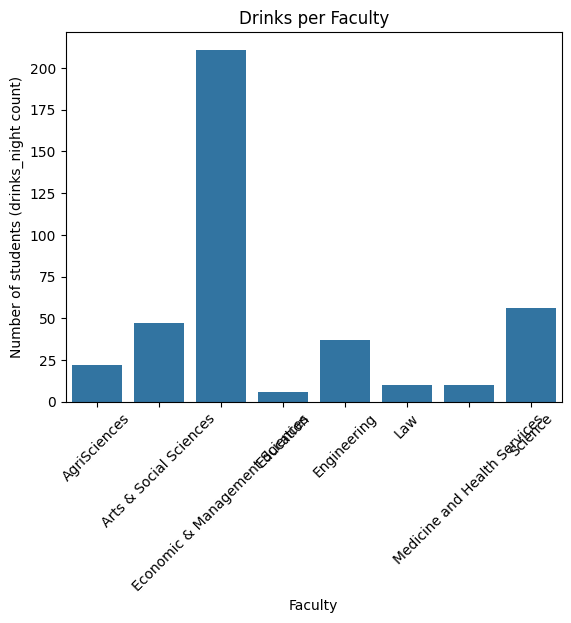

In [28]:
ax = sns.barplot(x=info.index, y=info.values)
ax.set(
    xlabel="Faculty",
    ylabel="Number of students (drinks_night count)",
    title="Drinks per Faculty"
)
ax.tick_params(axis='x', rotation=45)


### Drinks per Faculty

The chart below shows how many students from each faculty reported their **"drinks per night"** in the survey.  
This helps identify participation levels across faculties and spot any noticeable differences in student responses.  
Each bar represents the **count of students** from a given faculty.


<Axes: xlabel='matric_%', ylabel='gpa_2023'>

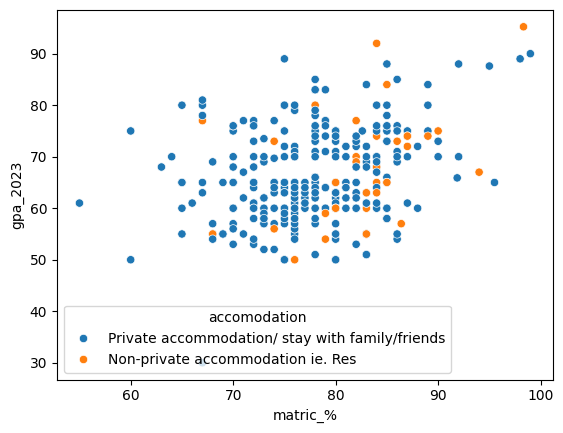

In [33]:
# Bublechart
sns.scatterplot(student_data, x ="matric_%" ,y ="gpa_2023",  hue ="accomodation")

### GPA vs. Matriculation Percentage by Accommodation Type

The scatter plot below compares each student’s **matriculation percentage** with their **GPA in 2023**.  
Points are color-coded by **accommodation type**, making it easy to see if living arrangements are linked to academic performance.  
Patterns or clusters in the plot may highlight how accommodation influences GPA relative to matriculation scores.


In [42]:
group_parent = student_data.groupby(by = "relation_parent")
info = group_parent[["matric_%","gpa_2023"]].aggregate(('min','max','mean'))
info

matric_%                   gpa_2023                  
                     min    max       mean      min    max       mean
relation_parent                                                      
Close               60.0  98.33  77.690000     50.0  95.22  65.220769
Distant             85.0  98.00  91.500000     88.0  89.00  88.500000
Fair                55.0  95.50  78.357143     50.0  85.00  66.258065
Very close          34.0  99.00  77.960114     30.0  92.00  66.527356

<Axes: xlabel='relation_parent'>

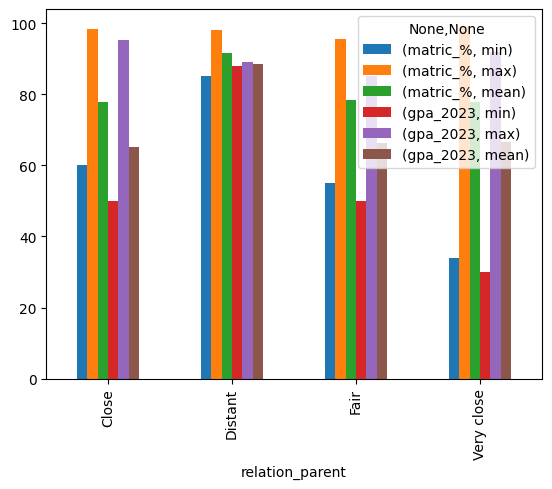

In [46]:
info.plot.bar()

### Academic Performance Summary by Parent Relationship

This bar chart compares the **minimum**, **maximum**, and **average** values of both  
**matriculation percentage** and **2023 GPA** across different levels of student–parent relationships.  

By showing all three statistics, the chart highlights:  
- The **range** of academic performance within each group (min to max).  
- The **average performance** for each category, making comparisons easier.  
- How relationship closeness may be associated with higher or lower academic results.


<Axes: xlabel='gpa_2023', ylabel='gender'>

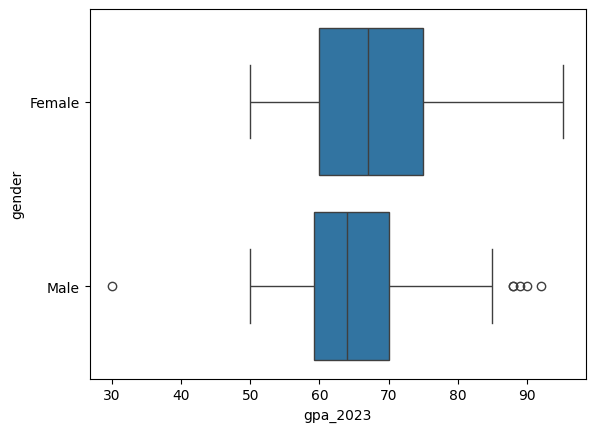

In [48]:
sns.boxplot(student_data, x= "gpa_2023", y = "gender")

### GPA Distribution by Gender

This box plot shows the **spread of 2023 GPA scores** for each gender group.  

- The **box** represents the middle 50% of students (interquartile range).  
- The **line inside the box** is the median GPA.  
- **Whiskers** and points show the overall range and any outliers.  

This view helps compare typical performance, variability, and extremes between genders.


## Manipulation and/or Cleaning Data
* remove unessory columns
* Null Value handling
* outliers Handling
* Feature Engineering
* Encoding/ normalization / post Processing

In [3]:
# Deleting columns
student_data.drop('time', axis= 1, inplace = True)

In [4]:
student_data.head()

,gender,matric_%,study_year,faculty,gpa_2023,accomodation,allowance,scholarship,study_hours,party_week,drinks_night,missed_classes,failed_classes,in_relationship,parent_approve,relation_parent
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [5]:
# Handling Null Values

student_data.isna().sum()

gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

In [6]:
# Cleaning up Traget value null entries
student_data_1 = student_data.dropna(subset="gpa_2023")

In [7]:
# student_data_1 = student_data_1.dropna(thresh=5)

student_data_1 = student_data_1[~(student_data_1.isna().sum(axis = 1) >=5)]

In [8]:
student_data_1.isna().sum()

gender              0
matric_%            2
study_year          1
faculty             3
gpa_2023            0
accomodation        2
allowance          14
scholarship         0
study_hours         0
party_week          0
drinks_night        0
missed_classes      1
failed_classes      0
in_relationship     1
parent_approve      1
relation_parent     1
dtype: int64

In [10]:
student_data1.isna().sum()

gender              0
matric_%            5
study_year         71
faculty             5
gpa_2023           84
accomodation       21
allowance          29
scholarship         6
study_hours         1
party_week          0
drinks_night        0
missed_classes      1
failed_classes      1
in_relationship     1
parent_approve      2
relation_parent     1
dtype: int64

In [9]:
## Full null values (sum < 5) , check type and impute with mean if numerical , mode if object
def imputer(dataframe):
    for col in dataframe.columns:
        if dataframe[col].isna().sum() < 5:
            if dataframe[col].dtype in ['int64','float64']:
                dataframe[col].fillna(dataframe[col].mean(), inplace = True)
            else:
                dataframe[col].fillna(dataframe[col].mode()[0], inplace = True)
    # return dataframe

In [10]:
imputer(student_data_1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5976\2939291566.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[col].fillna(dataframe[col].mode()[0], inplace = True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_5976\2939291566.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [11]:
student_data_1.isna().sum()

gender              0
matric_%            0
study_year          0
faculty             0
gpa_2023            0
accomodation        0
allowance          14
scholarship         0
study_hours         0
party_week          0
drinks_night        0
missed_classes      0
failed_classes      0
in_relationship     0
parent_approve      0
relation_parent     0
dtype: int64

In [12]:
student_data_1.allowance.value_counts()

allowance
R 4001- R 5000     125
R 5001 - R 6000     88
R 6001 - R 7000     44
R 7001 - R 8000     25
R 8000+             24
Name: count, dtype: int64

In [13]:
student_data_1.allowance.fillna('Unknown', inplace = True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5976\1313249778.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data_1.allowance.fillna('Unknown', inplace = True)


In [14]:
student_data_1.allowance.value_counts()

allowance
R 4001- R 5000     125
R 5001 - R 6000     88
R 6001 - R 7000     44
R 7001 - R 8000     25
R 8000+             24
Unknown             14
Name: count, dtype: int64

In [15]:
# Outlier Handling
student_data_1[['matric_%','gpa_2023']].describe()

,matric_%,gpa_2023
count,320.000000,320.000000
mean,78.165692,66.268469
std,6.600239,9.147906
min,55.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


<Axes: >

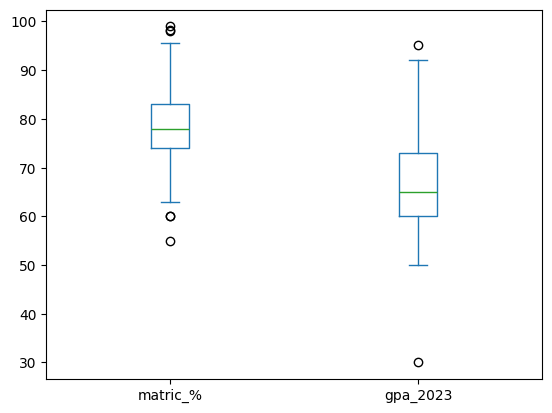

In [16]:
student_data_1[['matric_%','gpa_2023']].plot.box()

In [17]:
def handle_outlier(series: pd.Series):
    """ DocString """
    IQR = series.quantile(0.75) - series.quantile(0.25)
    max_value = series.quantile(0.75) + 1.5 * IQR
    min_value = series.quantile(0.25) - 1.5 * IQR

    to_drop = series[(series > max_value) | (series < min_value)]
    print(to_drop)
    return series.drop(to_drop.index, axis=0)

In [18]:
student_data_1.gpa_2023 = handle_outlier(student_data_1.gpa_2023)

73     95.22
303    30.00
Name: gpa_2023, dtype: float64


In [19]:
student_data_1['matric_%'] = handle_outlier(student_data_1['matric_%'])

38     99.00
54     98.00
73     98.33
268    60.00
335    55.00
358    60.00
Name: matric_%, dtype: float64


<Axes: >

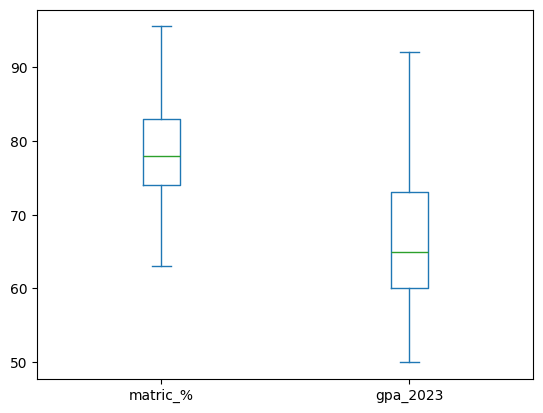

In [20]:
student_data_1[['matric_%','gpa_2023']].plot.box()

In [21]:
student_data_1.study_hours.value_counts()

study_hours
8+     97
3-5    76
1-3    65
5-8    65
0      17
Name: count, dtype: int64

In [22]:
student_data_1.to_csv("student_survey_clean.csv", index = False)

In [23]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           404 non-null    object 
 1   matric_%         399 non-null    float64
 2   study_year       333 non-null    object 
 3   faculty          399 non-null    object 
 4   gpa_2023         320 non-null    float64
 5   accomodation     383 non-null    object 
 6   allowance        375 non-null    object 
 7   scholarship      398 non-null    object 
 8   study_hours      403 non-null    object 
 9   party_week       404 non-null    object 
 10  drinks_night     404 non-null    object 
 11  missed_classes   403 non-null    object 
 12  failed_classes   403 non-null    object 
 13  in_relationship  403 non-null    object 
 14  parent_approve   402 non-null    object 
 15  relation_parent  403 non-null    object 
dtypes: float64(2), object(14)
memory usage: 50.9+ KB


In [24]:
student_data.isna().sum()

gender              2
matric_%            7
study_year         73
faculty             7
gpa_2023           86
accomodation       23
allowance          31
scholarship         8
study_hours         3
party_week          2
drinks_night        2
missed_classes      3
failed_classes      3
in_relationship     3
parent_approve      4
relation_parent     3
dtype: int64

In [25]:
student_data.gender.value_counts(normalize = True)

gender
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

In [26]:
# parent_approve , replation_parent

table = pd.crosstab(student_data.parent_approve, student_data.relation_parent)
table = table[["Distant","Fair","Close","Very close"]]
table

relation_parent,Distant,Fair,Close,Very close
parent_approve,,,,
No,1,9,18,20
Yes,1,25,79,248


<Axes: xlabel='relation_parent'>

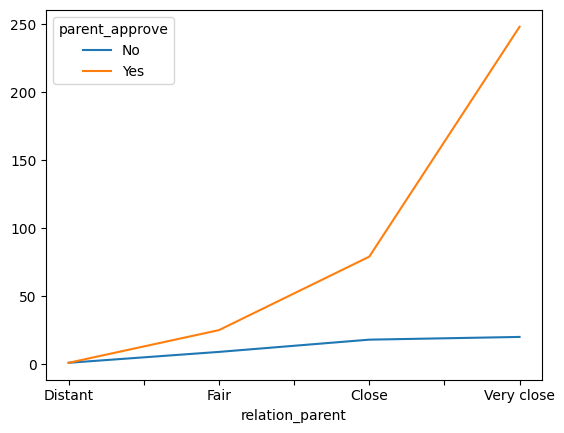

In [27]:
table.T.plot.line()

In [28]:
group_parent = student_data.groupby(by= "relation_parent")
info = group_parent["matric_%"].aggregate(('min','max','mean'))

In [29]:
info

,min,max,mean
relation_parent,,,
Close,60.0,98.33,77.690000
Distant,85.0,98.00,91.500000
Fair,55.0,95.50,78.357143
Very close,34.0,99.00,77.960114
